<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221026_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 에포크를 얼마나 돌려야하는가? -> 과적합을 어떻게 구분할 것 인가? 우선 그래프를 그려보자 -> matplotlib이용
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:, 12]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   shuffle=True)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.648332,0.652297,0.338845,0.866923
1,0.304745,0.869387,0.265817,0.894615
2,0.251552,0.910957,0.219787,0.935385
3,0.235458,0.925071,0.212497,0.940000
4,0.227179,0.926610,0.209284,0.933846
...,...,...,...,...
1995,0.032097,0.991789,0.047892,0.982308
1996,0.030938,0.990249,0.037767,0.986923
1997,0.026188,0.993328,0.033996,0.989231
1998,0.025749,0.994355,0.036622,0.988462


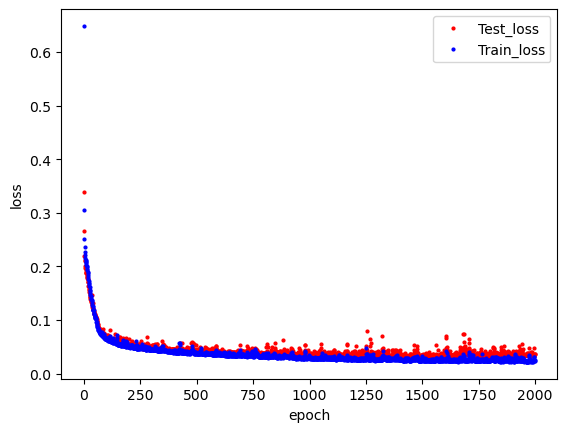

In [ ]:
import numpy as np
y_vloss = hist_df['val_loss'] # validation했을때 생기는 손실
y_loss = hist_df['loss'] #학습할때 생기는 손실

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Test_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Train_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()